In [148]:
import pandas as pd
import numpy as np
import plotly.express  as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [149]:
normal_data = pd.read_csv("s3://demoappayaz/big_student_clear_third_version.csv")

udemy_data = pd.read_csv("s3://demoappayaz/udemy_courses.csv")

In [151]:
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


### Data Cleaning

In [152]:
#Checking for null values.

udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null object
price                  3683 non-null object
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null int64
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3683 non-null object
subject                3683 non-null object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


In [153]:
# Checking the datatype of the columns

udemy_data.dtypes

course_id               int64
course_title           object
url                    object
is_paid                object
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [154]:
#Checking the unique values in price column of udemy dataset

udemy_data['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [155]:
#Changing the word "free" to "0" in the column price.
#dropping the course row whose value is 'True' in price column 

udemy_data['price'] = np.where(udemy_data['price'] == 'Free', 0, udemy_data['price'])

udemy_data.drop(udemy_data[udemy_data['course_id'] == 96698].index, axis=0, inplace=True)

In [156]:
#Chaning the datatype of price column to int

udemy_data['price'] = udemy_data['price'].astype(int)

In [157]:
udemy_data['is_paid'].value_counts()

True     2738
TRUE      634
False     264
FALSE      46
Name: is_paid, dtype: int64

In [158]:
#Cleaning the is_paid column

udemy_data.loc[:, 'is_paid'] = udemy_data.loc[:, 'is_paid'].apply(lambda s: s.capitalize())
udemy_data['is_paid'] = udemy_data['is_paid'].map({'False': False, 'True': True})

In [159]:
udemy_data['content_duration'].unique()

array(['1.5 hours', '39 hours', '2.5 hours', '3 hours', '2 hours',
       '1 hour', '5 hours', '7 hours', '4 hours', '35 mins', '4.5 hours',
       '6.5 hours', '10 hours', '5.5 hours', '7.5 hours', '11.5 hours',
       '16 hours', '3.5 hours', '9 hours', '8.5 hours', '11 hours',
       '42 mins', '9.5 hours', '218 questions', '18 questions', '33 mins',
       '62 hours', '8 mins', '41 mins', '31.5 hours', '20 hours',
       '6 hours', '46.5 hours', '43 mins', '17.5 hours', '12 hours',
       '32 mins', '24 hours', '19.5 hours', '20.5 hours', '30 mins',
       '10.5 hours', '31 mins', '36 mins', '8 hours', '29 hours',
       '26 hours', '24.5 hours', '13 hours', '44 mins', '34 mins',
       '12.5 hours', '19 mins', '37 mins', '40 mins', '18 hours',
       '33 hours', '71.5 hours', '47 hours', '14.5 hours', '39 mins',
       '18.5 hours', '43.5 hours', '38 mins', '14 hours', '28 mins',
       '24 questions', '45 hours', '70 hours', '0', '29.5 hours',
       '82 questions', '13.5 hours',

In [160]:
#Appending "min" to the content_duration content_duration column where value is 0.

udemy_data.loc[udemy_data['content_duration']=='0', 'content_duration'] = '0 mins'

In [161]:
udemy_data['content_duration_hrs'] = udemy_data['content_duration'].str.split(' ').str[0]
udemy_data['content_duration_units'] = udemy_data['content_duration'].str.split(' ').str[1]

In [162]:
udemy_data['content_duration_hrs'] = udemy_data.content_duration_hrs.astype(float)
udemy_data = udemy_data.drop([93,95,847,970],axis=0).reset_index(drop=True)

def convert_mins_to_hours(row):
    if row['content_duration_units'] == 'mins':
        return row['content_duration_hrs']/60
    else:
        return row['content_duration_hrs']
    
udemy_data.loc[:, 'content_duration_hrs'] = udemy_data.apply(convert_mins_to_hours, axis=1)

In [163]:
udemy_data['content_duration_hrs'] = np.round_(udemy_data['content_duration_hrs'], decimals=1)
udemy_data['num_subscribers'] = udemy_data['num_subscribers'].astype(int)
udemy_data['num_lectures'] = udemy_data['num_lectures'].astype(int)
udemy_data['num_reviews'] = udemy_data['num_reviews'].astype(int)
udemy_data['course_id'] = udemy_data['course_id'].astype(str)

In [164]:
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])
udemy_data['date_published'] = udemy_data.loc[:, 'published_timestamp'].apply(lambda s: s.date())
udemy_data['year_published'] = udemy_data.loc[:, 'published_timestamp'].apply(lambda s: s.year)
udemy_data['month_published'] = udemy_data.loc[:, 'published_timestamp'].apply(lambda s: s.month_name())

In [166]:
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_hrs,content_duration_units,date_published,year_published,month_published
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18 20:58:58+00:00,Business Finance,1.5,hours,2017-01-18,2017,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09 16:34:20+00:00,Business Finance,39.0,hours,2017-03-09,2017,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19 19:26:30+00:00,Business Finance,2.5,hours,2016-12-19,2016,December
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30 20:07:24+00:00,Business Finance,3.0,hours,2017-05-30,2017,May
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13 14:57:18+00:00,Business Finance,2.0,hours,2016-12-13,2016,December


In [167]:
#Percentage of topics in udemy

temp_df = pd.DataFrame(udemy_data['subject'].value_counts()).reset_index()



fig = go.Figure(data=[go.Pie(labels=temp_df['index'],
                             values=temp_df['subject'],
                             hole=.7,
                             title = '% of Courses by Subject',
                             marker_colors = px.colors.sequential.Blues_r,
                            )
                     
                     ])
fig.update_layout(title='Amount of Courses by Subject')
fig.show()


In [19]:
%%capture

UsageError: %%capture is a cell magic, but the cell body is empty.


In [168]:
# Filter paid courses
paid_courses_df = udemy_data.query("price != 'Free'").sort_values('num_reviews',ascending=False)
paid_courses_df['price'] = paid_courses_df['price'].astype('float32')

In [169]:
# Top 25 Most Popular Paid Courses

top25_paid = paid_courses_df.sort_values("num_subscribers", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()
fig = px.bar(top25_paid,
               y    = 'index',
               x    = 'num_subscribers',
               orientation = 'h',
               color       = 'num_subscribers',
               hover_name  = 'course_title',
               title       = 'Top 25 Most Popular Courses (by number of subscribers)',
               opacity     = 0.8,
               color_continuous_scale = px.colors.sequential.ice,
               height = 800,
              )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Course Title',showticklabels=False)
fig.show()

In [ ]:
#Courses that have most subscriber

# course = udemy_data.loc[:, ['course_title','num_subscribers']]
# course = course.groupby('course_title')['num_subscribers'].max().reset_index()
# course = course.sort_values('num_subscribers', ascending=False)
# course = course.head(10)

# fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
# fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
# fig.show()

In [170]:
#Percentage of topics in udemy

temp_df = pd.DataFrame(udemy_data['subject'].value_counts()).reset_index()



fig = go.Figure(data=[go.Pie(labels=temp_df['index'],
                             values=temp_df['subject'],
                             hole=.7,
                             title = '% of Courses by Subject',
                             marker_colors = px.colors.sequential.Blues_r,
                            )
                     
                     ])
fig.update_layout(title='Amount of Courses by Subject')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
fig.show()

<Figure size 432x288 with 0 Axes>

In [171]:
%%time

import os
import boto3
import re
import copy
import time
import io
import struct
from time import gmtime, strftime
from sagemaker import get_execution_role

bucket = "demoappayaz"
prefix = 'sagemaker'


key = "{}/examples".format(prefix)
url = 's3://{}/{}'.format(bucket, key)
boto3.Session().resource('s3').Bucket(bucket).Object(key).upload_file('samples.jpg')
print('Done writing to {}'.format(url))

Done writing to s3://demoappayaz/sagemaker/examples
CPU times: user 53.1 ms, sys: 17.3 ms, total: 70.4 ms
Wall time: 231 ms


In [38]:
# import boto3
# s3 = boto3.client('s3')
# bucket = "demoappayaz"
# file_name = 'samples.jpg'
# key_name = 'sample'
# s3.upload_file(file_name, bucket, key_name)

In [172]:
import boto3
s3 = boto3.resource('s3')
s3.Object('demoappayaz','plot.png').upload_file(Filename='plot.png')

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(df, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [67]:
course = udemy_data.loc[:, ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].max().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.head(10)

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn',
            title='Most Subscribed Courses',
             hover_data=['num_subscribers'], labels={'num_subscribers':'num_subscribers'})
fig.update_traces(textposition='inside', textinfo="percent+label")
fig.show()

In [83]:
# Filter paid courses
paid_courses_df = udemy_data.query("price != 0").sort_values('num_reviews',ascending=False)
paid_courses_df['price'] = paid_courses_df['price'].astype('float32')

In [87]:
top25_paid = paid_courses_df.sort_values("num_subscribers", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

In [90]:
top25_paid

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_hrs,content_duration_units,date_published,year_published,month_published
0,0,42271,Complete Guitar System - Beginner to Advanced,https://www.udemy.com/complete-guitar-system-b...,True,145.0,32935,2713,310,All Levels,34 hours,2013-05-29 15:24:47+00:00,Musical Instruments,34.0,hours,2013-05-29,2013,May
1,1,249126,Logo Design Essentials,https://www.udemy.com/logo-design/,True,20.0,33205,481,12,All Levels,42 mins,2014-06-30 03:09:27+00:00,Graphic Design,0.7,mins,2014-06-30,2014,June
2,2,519442,The Complete Ruby on Rails Developer Course,https://www.udemy.com/the-complete-ruby-on-rai...,True,195.0,33677,3809,283,All Levels,31.5 hours,2015-10-23 20:29:25+00:00,Web Development,31.5,hours,2015-10-23,2015,October
3,3,446134,Ultimate Web Designer & Developer Course: Buil...,https://www.udemy.com/web-developer-course/,True,200.0,33788,4434,246,All Levels,32.5 hours,2015-08-20 20:55:19+00:00,Web Development,32.5,hours,2015-08-20,2015,August
4,4,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50.0,35267,217,53,All Levels,4 hours,2012-04-25 00:01:43+00:00,Web Development,4.0,hours,2012-04-25,2012,April
5,5,820194,Photoshop for Entrepreneurs - Design 11 Practi...,https://www.udemy.com/photoshop-for-entreprene...,True,200.0,36288,737,63,All Levels,5 hours,2016-06-09 01:57:03+00:00,Graphic Design,5.0,hours,2016-06-09,2016,June
6,6,674608,The Complete Web Developer Masterclass: Beginn...,https://www.udemy.com/webdevelopercourse/,True,195.0,37141,1813,316,All Levels,51 hours,2016-05-18 00:16:26+00:00,Web Development,51.0,hours,2016-05-18,2016,May
7,7,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,True,150.0,40070,8341,194,All Levels,9.5 hours,2016-03-03 20:17:59+00:00,Web Development,9.5,hours,2016-03-03,2016,March
8,8,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285,525,24,All Levels,4 hours,2013-01-03 00:55:31+00:00,Web Development,4.0,hours,2013-01-03,2013,January
9,9,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285,525,24,All Levels,4 hours,2013-01-03 00:55:31+00:00,Web Development,4.0,hours,2013-01-03,2013,January


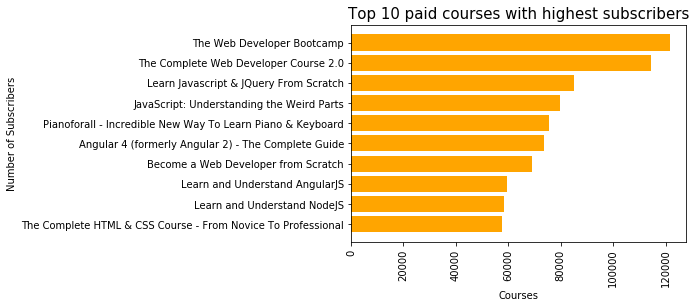

<Figure size 3600x3600 with 0 Axes>

In [138]:
top10_paid = paid_courses_df.sort_values("num_subscribers", ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

plt.barh("course_title", "num_subscribers", data = top10_paid, color = "orange")
plt.title("Top 10 paid courses with highest subscribers", fontsize=15)


plt.yticks()
plt.xticks(rotation = 90)
plt.xlabel("Courses")
plt.ylabel("Number of Subscribers")

plt.figure(figsize=(50,50))

plt.show()

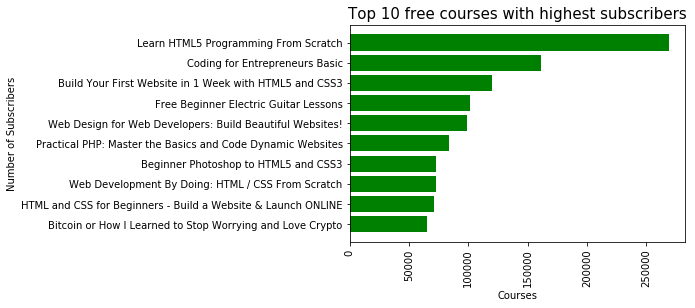

<Figure size 3600x3600 with 0 Axes>

In [137]:
free_courses_df = udemy_data.query("price == 0").sort_values('num_reviews',ascending=False)
top10_free = free_courses_df.sort_values("num_subscribers", ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()
# plt.barh("course_title", "num_subscribers", data = top10_free, color = "orange")

plt.barh("course_title", "num_subscribers", data = top10_free, color = "green")
plt.title("Top 10 free courses with highest subscribers", fontsize=15)


plt.yticks()
plt.xticks(rotation = 90)
plt.xlabel("Courses")
plt.ylabel("Number of Subscribers")

plt.figure(figsize=(50,50))

plt.show()

In [136]:
subject = udemy_data.loc[udemy_data['is_paid']==0, ['is_paid','subject']]
subject['count'] = subject.groupby('subject')['is_paid'].transform('count')
subject.drop(['is_paid'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('count')

fig = px.pie(subject, names='subject', values='count', template='seaborn', title="Number of  free courses in the domain")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [140]:
course = udemy_data.loc[udemy_data['course_title'].isin(top_5), ['course_title','num_lectures']]
course = course.groupby('course_title')['num_lectures'].max().reset_index()
course = course.sort_values('num_lectures', ascending=False)
course = course.head()

plt.bar("course_title", "num_subscribers", data = top10_paid, color = "orange")
plt.title("Top 10 paid courses with highest subscribers", fontsize=15)

plt.yticks()
plt.xticks(rotation = 90)
plt.xlabel("Courses")
plt.ylabel("Number of Subscribers")

plt.figure(figsize=(50,50))

plt.show()

KeyError: "None of [Index(['Ultimate Investment Banking Course',\n       'Complete GST Course & Certification - Grow Your CA Practice',\n       'Financial Modeling for Business Analysts and Consultants',\n       'Beginner to Pro - Financial Analysis in Excel 2017',\n       'How To Maximize Your Profits Trading Options',\n       'Trading Penny Stocks: A Guide for All Levels In 2017',\n       'Investing And Trading For Beginners: Mastering Price Charts',\n       'Trading Stock Chart Patterns For Immediate, Explosive Gains',\n       'Options Trading 3 : Advanced Stock Profit and Success Method',\n       'The Only Investment Strategy You Need For Your Retirement',\n       ...\n       'A how to guide in HTML', 'Building Better APIs with GraphQL',\n       'Learn Grunt with Examples: Automate Your Front End Workflow',\n       'Build A Stock Downloader With Visual Studio 2015 And C#',\n       'jQuery UI in Action: Build 5 jQuery UI Projects',\n       'Learn jQuery from Scratch - Master of JavaScript library',\n       'How To Design A WordPress Website With No Coding At All',\n       'Learn and Build using Polymer',\n       'CSS Animations: Create Amazing Effects on Your Website',\n       'Using MODX CMS to Build Websites: A Beginner's Guide'],\n      dtype='object', length=3678)] are in the [index]"

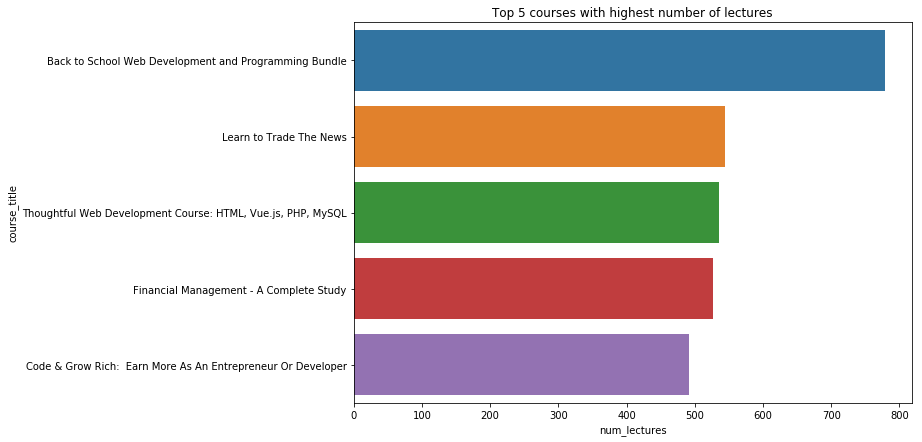

In [147]:
import seaborn as sns

course = udemy_data.loc[:, ['course_title','num_lectures']]
course = course.groupby('course_title')['num_lectures'].max().reset_index()
course = course.sort_values('num_lectures', ascending=False)
course = course.head()

plt.figure(figsize=(10,7))
sns.barplot(data=course, x='num_lectures', y='course_title').set_title('Top 5 courses with highest number of lectures')
plt.show()